In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler

start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')


def load_data(data_location):
    data=pickle.load(open(data_location, 'rb'))
    return data

X_train=load_data('./X_sampled_train.pkl')
X_val=load_data('./X_sampled_val.pkl')
X_test=load_data('./X_sampled_test.pkl')

y_train=load_data('./Y_sampled_train.pkl')
y_val=load_data('./Y_sampled_val.pkl')
y_test=load_data('./Y_sampled_test.pkl')

le=load_data('./le.pkl')

end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\nstart: {start_string}, end: {end_string}')



start: 2022/08/17 22:10:03, end: 2022/08/17 22:10:08


In [2]:
print(type(X_train))
print(type(X_val))
print(type(X_test))
print(type(y_train))
print(type(y_val))
print(type(y_test))



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [3]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')
# print(len(df_experiment))
# print(df_experiment.Label.nunique())
# print(df_experiment.Label.value_counts())
print("\n[after spliting the data (training data)]")
print(f'training data length {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
#print(f'[Instances per label]\n{y_train.value_counts()}')
#print(y_train.value_counts(normalize=True))

                                               
                                                  
print("\n[after spliting the data (test data)]")
print(f'test data length {len(X_test)}')
print(f'Shape of X_train: {X_test.shape}')
print(f'Shape of y_train: {y_test.shape}')
#print(f'[Instances per label]\n{y_test.value_counts()}')
#print(y_test.value_counts(normalize=True))
# print(y_train.nunique())
# print(y_train.value_counts())


print("\n[after spliting the data (v alidataion data)]")
print(f'Shape of x_val: {X_val.shape}')
print(f'Shape of y_val: {y_val.shape}')
#print(f'[Instances per label]\n{y_val.value_counts()}')
#print(y_val.value_counts(normalize=True))

Shape of X_train: (10016523, 78)
Shape of y_train: (10016523,)
Shape of X_test: (848363, 78)
Shape of y_test: (848363,)

[after spliting the data (training data)]
training data length 10016523
Shape of X_train: (10016523, 78)
Shape of y_train: (10016523,)

[after spliting the data (test data)]
test data length 848363
Shape of X_train: (848363, 78)
Shape of y_train: (848363,)

[after spliting the data (v alidataion data)]
Shape of x_val: (593854, 78)
Shape of y_val: (593854,)


In [4]:
### reshape input data to LSTM format [samples, time_steps, features]
import tensorflow_addons as tfa
import tensorflow as tf
from model_evaluator import Evaluator
from sklearn.metrics import recall_score, precision_score, f1_score
from tensorflow.keras import Model, Sequential, Input, backend
from tensorflow.keras.layers import LSTM, Dense, Dropout, InputLayer, Flatten, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam


print('start')
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')
n_classes = len(le.classes_)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
X_val_lstm = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])

print(y_train)
print(y_val)
y_train2=tf.keras.utils.to_categorical(y_train, num_classes=n_classes)
y_val2=tf.keras.utils.to_categorical(y_val, num_classes=n_classes)
y_test2=tf.keras.utils.to_categorical(y_test, num_classes=n_classes)

print(f"shape of X_train:\t{X_train_lstm.shape}")
print(f"shape of X_test:\t{X_test_lstm.shape}")
print(f"shape of X_val:\t{X_val_lstm.shape}")
print(f"shape of y_train:\t{y_train.shape}")
print(f"shape of y_train2:\t{y_train2.shape}")
print(f"shape of y_val:\t{y_val.shape}")
print(f"shape of y_val2:\t{y_val2.shape}")
print(f"shape of y_test:\t{y_test.shape}")
print(f"shape of y_test2:\t{y_test2.shape}")

print(f'y_train2: {y_train2[:10]}')
print(f'y_test2: {y_test[:10]}')

print(f"# of classes: {n_classes}")
n_features = X_train_lstm.shape[2]
print(f"# of features: {n_features}")


start
[0 0 0 ... 8 8 8]
[0 0 0 ... 0 0 0]
shape of X_train:	(10016523, 1, 78)
shape of X_test:	(848363, 1, 78)
shape of X_val:	(593854, 1, 78)
shape of y_train:	(10016523,)
shape of y_train2:	(10016523, 9)
shape of y_val:	(593854,)
shape of y_val2:	(593854, 9)
shape of y_test:	(848363,)
shape of y_test2:	(848363, 9)
y_train2: [[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0.]]
y_test2: [0 0 0 4 0 0 4 0 0 0]
# of classes: 9
# of features: 78


2022-08-17 22:10:10.266713: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2022-08-17 22:10:10.266742: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: jw-svr
2022-08-17 22:10:10.266748: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: jw-svr
2022-08-17 22:10:10.266837: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 470.141.3
2022-08-17 22:10:10.266859: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 470.129.6
2022-08-17 22:10:10.266865: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 470.129.6 does not match DSO version 470.141.3 -- cannot find working devices in this configuration
2022-08-17 22:10:10.267215: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30)                13080     
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 softmax (Dense)             (None, 9)                 279       
                                                                 
Total params: 13,359
Trainable params: 13,359
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
313017/313017 [==============================] - 318s 1ms/step - loss: 0.4246 - precision: 0.9277 - recall: 0.8075 - accuracy: 0.8693 - f1_score: 0.8676 - val_loss: 0.5648 - val_precision: 0.8426 - val_recall: 0.7991 - val_accuracy: 0.8142 - val_f1_score: 0.4297
Epoch 2/200
313017/313017 [==============

Epoch 28/200
313017/313017 [==============================] - 316s 1ms/step - loss: 0.0472 - precision: 0.9892 - recall: 0.9879 - accuracy: 0.9885 - f1_score: 0.9884 - val_loss: 0.2033 - val_precision: 0.9700 - val_recall: 0.9694 - val_accuracy: 0.9697 - val_f1_score: 0.6063
Epoch 29/200
313017/313017 [==============================] - 318s 1ms/step - loss: 0.0467 - precision: 0.9893 - recall: 0.9881 - accuracy: 0.9887 - f1_score: 0.9885 - val_loss: 0.2024 - val_precision: 0.9703 - val_recall: 0.9697 - val_accuracy: 0.9700 - val_f1_score: 0.6075
Epoch 30/200
313017/313017 [==============================] - 318s 1ms/step - loss: 0.0460 - precision: 0.9895 - recall: 0.9883 - accuracy: 0.9888 - f1_score: 0.9887 - val_loss: 0.2011 - val_precision: 0.9724 - val_recall: 0.9702 - val_accuracy: 0.9707 - val_f1_score: 0.6079
Epoch 31/200
313017/313017 [==============================] - 316s 1ms/step - loss: 0.0456 - precision: 0.9896 - recall: 0.9884 - accuracy: 0.9890 - f1_score: 0.9888 - val_

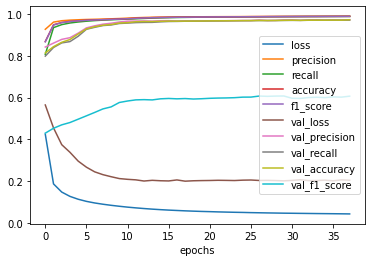


start: 2022/08/17 22:10:09, end: 2022/08/18 01:30:39


In [5]:


def multiClassModel(n_features, n_classes=9):
    model = Sequential()
    adam=Adam(learning_rate=3e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    model.add(Input(shape=(None, n_features)))
    ##model.add(InputLayer(shape=(None, n_features)))
    model.add(LSTM(units=30))
    model.add(Dropout(0.3))
    model.add(Dense(n_classes, activation="softmax", name="softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=[tf.keras.metrics.Precision(name='precision'),
                                                                              tf.keras.metrics.Recall(name='recall'),
                                                                              'accuracy',
                                                                              tfa.metrics.F1Score(num_classes=n_classes,
                                                                                                  average='macro')])
    #model.compile(loss="categorical_crossentropy", optimizer='Adam', metrics=[Evaluator.precision, 
    #                                                                          Evaluator.recall,
    #                                                                          'accuracy',
    #                                                                          Evaluator.fmeasure])

    model.summary()
    return model

callback = EarlyStopping(patience=20, mode='min', restore_best_weights=True)
backend.clear_session()
model = multiClassModel(n_features, n_classes)
history = model.fit(X_train_lstm, y_train2, 
                    epochs=200, batch_size=32, validation_data=(X_val_lstm, y_val2), callbacks=[callback])
                    #epochs=5, batch_size=64, validation_split=0.2, callbacks=[callback])

### check the history of epochs
#pd.DataFrame(history.history).plot(kind='line', xlabel='epochs', figsize=(8, 6))
pd.DataFrame(history.history).plot(kind='line', xlabel='epochs')

import matplotlib.pyplot as plt
plt.show()
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\nstart: {start_string}, end: {end_string}')


In [6]:
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')
y_train_pred_prob = model.predict(X_train_lstm)
y_test_pred_prob = model.predict(X_test_lstm)
y_train_pred = np.argmax(y_train_pred_prob, axis=1)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')


[DONE] start: 2022/08/18 01:30:39, end: 2022/08/18 01:32:55



[DONE] start: 2022/08/18 01:32:55, end: 2022/08/18 01:32:56


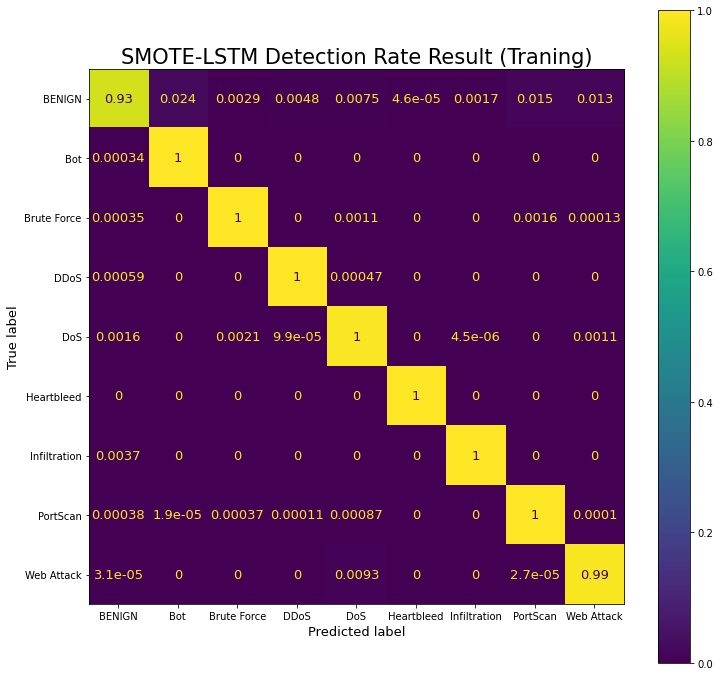

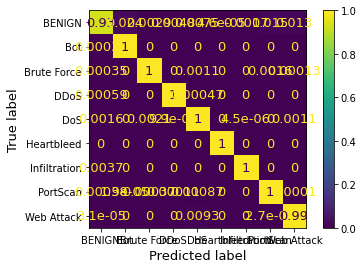

In [7]:
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from numpy import argmax

%matplotlib inline
y_train3=argmax(y_train2, axis=1)
plt.rc('font', size=13)        # 기본 폰트 크기
plt.rc('axes', labelsize=13)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=10)  # 범례 폰트 크기
plt.rc('figure', titlesize=80) # figure title 폰트 크기

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('SMOTE-LSTM Detection Rate Result (Traning)',fontdict={'size':'21'})

ConfusionMatrixDisplay.from_predictions(y_train3, y_train_pred, display_labels=le.classes_, normalize='true').plot(ax=ax)
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')


[DONE] start: 2022/08/18 01:32:57, end: 2022/08/18 01:32:57


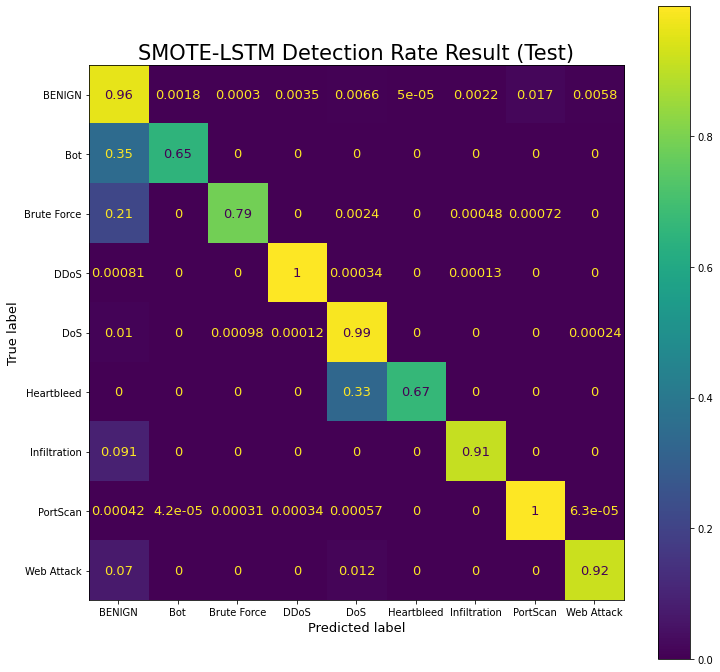

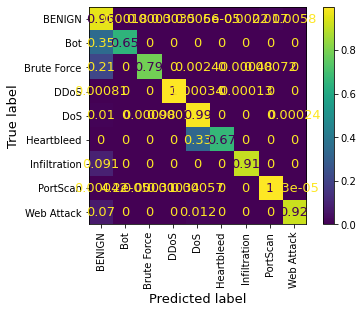

In [8]:
start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from numpy import argmax

%matplotlib inline
y_test3=argmax(y_test2, axis=1)
plt.rc('font', size=13)        # 기본 폰트 크기
plt.rc('axes', labelsize=13)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=10)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=10)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=10)  # 범례 폰트 크기
plt.rc('figure', titlesize=80) # figure title 폰트 크기


fig, ax = plt.subplots(figsize=(12, 12))
ax.set_title('SMOTE-LSTM Detection Rate Result (Test)',fontdict={'size':'21'})
ConfusionMatrixDisplay.from_predictions(y_test3, y_test_pred, display_labels=le.classes_, normalize='true',
                                       xticks_rotation='vertical').plot(ax=ax)


end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')

In [9]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
    return df_performance



y_train_pred_labels = le.inverse_transform(y_train_pred)
y_train_labels = le.inverse_transform(y_train)
print(classification_report(y_train_labels, y_train_pred_labels, digits=4, labels=le.classes_))
#performance = multilabel_matrix(y_train_pred_labels, y_train_labels, labels=le.classes_)
#performance

end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')

              precision    recall  f1-score   support

      BENIGN     0.9926    0.9306    0.9606   1112947
         Bot     0.9763    0.9997    0.9878   1112947
 Brute Force     0.9946    0.9969    0.9958   1112947
        DDoS     0.9950    0.9989    0.9970   1112947
         DoS     0.9810    0.9951    0.9880   1112947
  Heartbleed     1.0000    1.0000    1.0000   1112947
Infiltration     0.9983    0.9963    0.9973   1112947
    PortScan     0.9832    0.9981    0.9906   1112947
  Web Attack     0.9859    0.9906    0.9882   1112947

    accuracy                         0.9896  10016523
   macro avg     0.9897    0.9896    0.9895  10016523
weighted avg     0.9897    0.9896    0.9895  10016523


[DONE] start: 2022/08/18 01:32:57, end: 2022/08/18 01:36:48


In [10]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix

start=datetime.now()
start_string=start.strftime('%Y/%m/%d %H:%M:%S')

def multilabel_matrix(y_true, y_pred, labels=None):
    mlm = multilabel_confusion_matrix(y_true, y_pred, labels=labels)
    df_performance = pd.DataFrame(index=labels, columns=['accuracy', 'precision', 'recall', 'f1_score'])
    for i, label in enumerate(labels):
        tn, fp, fn, tp = mlm[i].ravel()
        accuracy = (tn + tp) / (tn + fp + fn + tp)
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        f1_score = 2*precision * recall / (precision + recall)
        df_performance.loc[label] = [round(accuracy, 4), round(precision,4), \
                                     round(recall, 4), round(f1_score,4)]
    return df_performance



y_test_pred_labels = le.inverse_transform(y_test_pred)
y_test_labels = le.inverse_transform(y_test)
print(classification_report(y_test_labels, y_test_pred_labels, digits=4, labels=le.classes_))
#performance = multilabel_matrix(y_train_pred_labels, y_train_labels, labels=le.classes_)
#performance
end=datetime.now()
end_string=end.strftime('%Y/%m/%d %H:%M:%S')
print(f'\n[DONE] start: {start_string}, end: {end_string}')


              precision    recall  f1-score   support

      BENIGN     0.9970    0.9627    0.9796    681396
         Bot     0.2349    0.6508    0.3452       587
 Brute Force     0.9173    0.7855    0.8463      4150
        DDoS     0.9416    0.9987    0.9693     38407
         DoS     0.9428    0.9884    0.9651     75514
  Heartbleed     0.0556    0.6667    0.1026         3
Infiltration     0.0066    0.9091    0.0131        11
    PortScan     0.8030    0.9983    0.8901     47641
  Web Attack     0.1312    0.9174    0.2295       654

    accuracy                         0.9675    848363
   macro avg     0.5589    0.8753    0.5934    848363
weighted avg     0.9772    0.9675    0.9711    848363


[DONE] start: 2022/08/18 01:36:48, end: 2022/08/18 01:37:05
